

# Project: No Show Medical Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset is taken from 100k medical appointments in Brazil regarding whether or not patients show up for their appointment after scheduling it. The following analysis will try to explore the linkages between the variables that decide the patient not showing up for the appointment

Dependent Variable: It is a variable that depends on other variables. Here we are interested in the variable 'No Show'

Independetnt Variables:
1. Age
2. Scheduled Day
3. Appointment Day
4. Gender
5. Scholarship
6. Sms Received


Questions:

1.Does Gender and having scholarship play a role in showing up?<br>
2.Does certain age not show up compared to other ages?<br>
3.Does sending sms to remind for the appointment will increase the chance of attending the appointment?<br>
4.Does the difference between scheduled data and appointment date have any impact
on showing with the Doctor?<br>




In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

<a id='wrangling'></a>
## Data Wrangling



### 1. General Properties

In [306]:
# Data Exploration
# Read csv file
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [313]:
df['Hipertension'].value_counts(normalize=True)

0    0.802754
1    0.197246
Name: Hipertension, dtype: float64

In [308]:
df['Hipertension'].value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

In [168]:
df.info()
# This is summary of total enries, datatypes and memory usage.
# This is useful for finding missing values and the datatypes of

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The loaded data gives us an idea about the datatypes,missing values.
The datatypes that need to be changed are of ScheduledDay and AppointmentDay. These both are
to be converted into datetime. Column 'No-show' need to be changed to 'No_show' to maintain uniformity. There is no missing data so no rows need to be deleted.
Some junk data should also be deleted if found


In [169]:
df.nunique()
# gives unique number of values of each columns
# To know the unique values of individual columns we use the following
#df['No-show'].unique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [170]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [171]:
df.duplicated().sum()

# The method of removing the duplicate values is as follows:
# df.drop_duplicates(inplace=True)


0

The above shows that there is no duplicated values. But the data types of ScheduledDay and
AppointmentDay are strings. They need to be converted  to a timestamp

### 2. Data Cleaning

In [172]:
# We need to change the 'ScheduledDay' and 'AppointmentDay' column into datatime stamp
# This has to be done because we need to get the difference between 'AppointmentDay' and 'ScheduledDay'

In [173]:
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])

In [174]:
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])

In [175]:
# Another way of doing this is we can parse it in the read_csv
# df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv',parse_dates=['ScheduledDay','AppointmentDay'])


In [176]:
df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

In [177]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [178]:
#Replacing some incorrect data into an appropriated value.
#Here we are checking the Age if it has some negative value.
#We replace this negative value by a mean Age.


In [179]:
df[df['Age']<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


In [180]:
age_mean=df['Age'].mean()

In [181]:
df.loc[99832,'Age']=age_mean

In [182]:
df.loc[99832,'Age']

37.08887421173107

In [183]:
df.loc[99832]

PatientId                       4.65943e+14
AppointmentID                       5775010
Gender                                    F
ScheduledDay      2016-06-06 08:58:13+00:00
AppointmentDay    2016-06-06 00:00:00+00:00
Age                                 37.0889
Neighbourhood                         ROMÃO
Scholarship                               0
Hipertension                              0
Diabetes                                  0
Alcoholism                                0
Handcap                                   0
SMS_received                              0
No-show                                  No
Name: 99832, dtype: object

In [184]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [185]:
#Changing 'No-show' to 'No_show'
# During using the query method I did find that 'No-show' was creating problems

In [186]:
headers=list(df.columns.values)

In [187]:
headers[-1]='No_show'

In [188]:
df.columns=headers

In [189]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No_show'],
      dtype='object')

In [190]:
#Dropping the columns which I am not going to use

In [191]:
df.drop(['Hipertension','Diabetes','Alcoholism','Handcap'],axis=1,inplace=True)

In [192]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,0,No


In [193]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [194]:
#Basic statistical details like percentile, mean, std etc

In [195]:
df.describe().Age
# Here I am only selecting the Age column because that is only relevant in terms of the values it has

count    110527.000000
mean         37.089219
std          23.109921
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [196]:
# Note:
#No null values were found. We can do this by the following code:
#df.isnull().sum. This will give the missing value count for each column.
#df.dropna(inplace=True)
#check: df.is_null().sum.any()

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: Does Gender and having scholarship play a role in showing up?

In [197]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,0,No


In [198]:
def percentage(amt,total):
    return (amt/total)*100

In [199]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

Genderwise percentage

In [200]:
df['Gender'].value_counts(normalize=True)

F    0.649977
M    0.350023
Name: Gender, dtype: float64

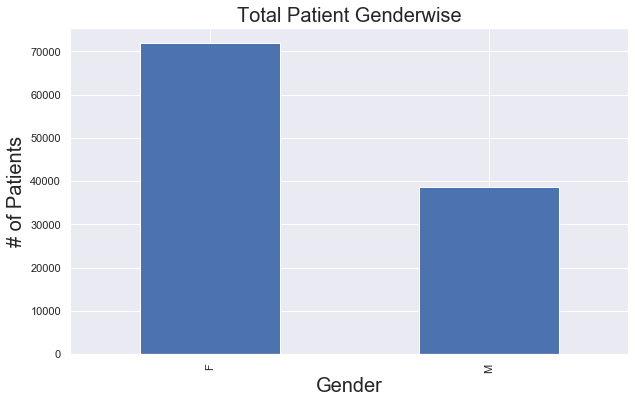

In [201]:
plt.figure(figsize=(10,6))

df.Gender.value_counts().plot(kind='bar')
plt.xlabel('Gender',size=20)
plt.ylabel('# of Patients',size=20)
plt.title('Total Patient Genderwise',size=20);


In [202]:
df_gender=df.Gender.value_counts(normalize=True)
names=['Female','Male']

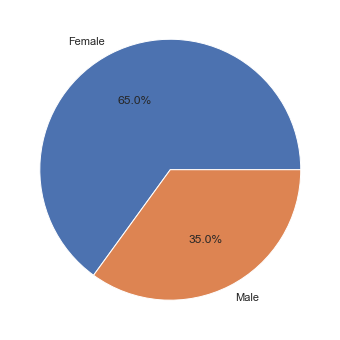

In [203]:
plt.figure(figsize=(8,6))
plt.pie(df_gender,labels=names,autopct='%1.1f%%');

Conclusion: 65% are Female and 35% are male

In [204]:
# Having Scholarship Percentage

In [205]:
df.Scholarship.value_counts(normalize=True)

0    0.901734
1    0.098266
Name: Scholarship, dtype: float64

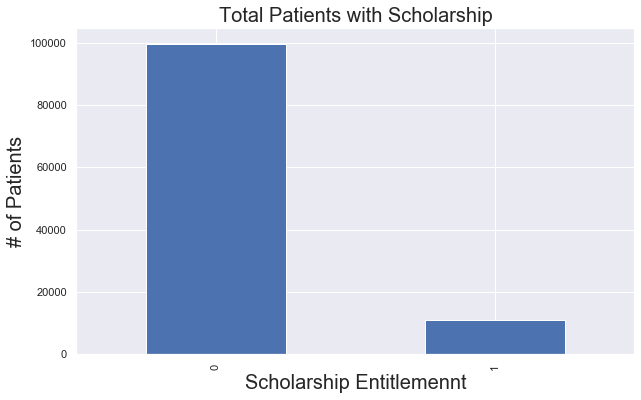

In [206]:
plt.figure(figsize=(10,6))

df.Scholarship.value_counts().plot(kind='bar')
plt.xlabel('Scholarship Entitlemennt',size=20)
plt.ylabel('# of Patients',size=20)
plt.title('Total Patients with Scholarship',size=20)
plt.legend;

In [207]:
df_scholar=df.Scholarship.value_counts(normalize=True)
names=['Female','Male']

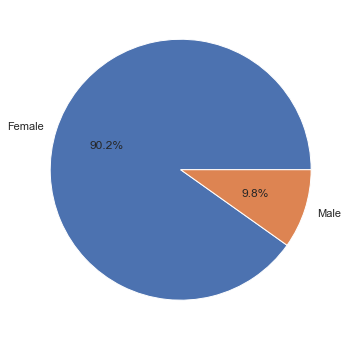

In [208]:
plt.figure(figsize=(8,6))
plt.pie(df_scholar,labels=names,autopct='%1.1f%%');

Conclusion: only 10% have the scholarship(free government health insurance)

Scholarship for female and Male percentage

In [209]:
female_sch=df[(df['Gender']=='F') & (df['Scholarship']==1)]['Scholarship'].count()

In [210]:
male_sch=df[(df['Gender']=='M') & (df['Scholarship']==1)]['Scholarship'].count()

In [211]:
percentage(female_sch,female_sch+male_sch)

81.51183132308259

In [212]:
percentage(male_sch,female_sch+male_sch)

18.48816867691741

Conclusion: Female have 81% of scholarship and male have 19% scholarship.

Scholarship for female and Male total

In [213]:
d=pd.Series([df[(df['Gender']=='F') & (df['Scholarship']==1)]['Scholarship'].count(),df[(df['Gender']=='M') & (df['Scholarship']==1)]['Scholarship'].count()],index=['Female','Males'])

In [214]:
d.head()

Female    8853
Males     2008
dtype: int64

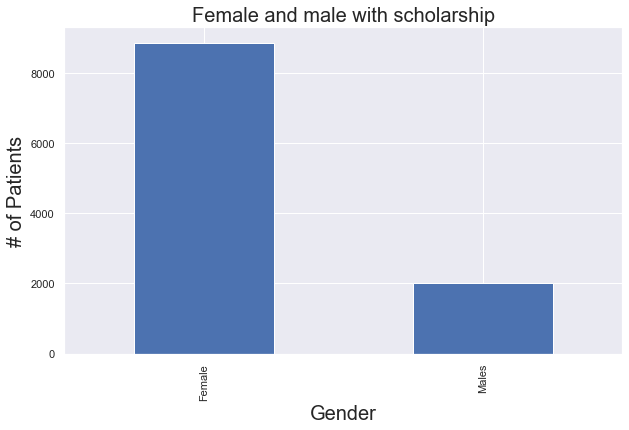

In [215]:
plt.figure(figsize=(10,6))
d.plot(kind='bar')
plt.xlabel('Gender',size=20)
plt.ylabel('# of Patients',size=20)
plt.title('Female and male with scholarship',size=20)
plt.legend;

Male/Female having scholarship and showing up to the appointment

In [216]:
q=pd.Series([df[(df['Gender']=='F') & (df['Scholarship']==1) & (df['No_show']=='No')]['Scholarship'].count(),df[(df['Gender']=='M') & (df['Scholarship']==1)& (df['No_show']=='No')]['Scholarship'].count()],index=['Female','Males'])

In [217]:
q

Female    6747
Males     1536
dtype: int64

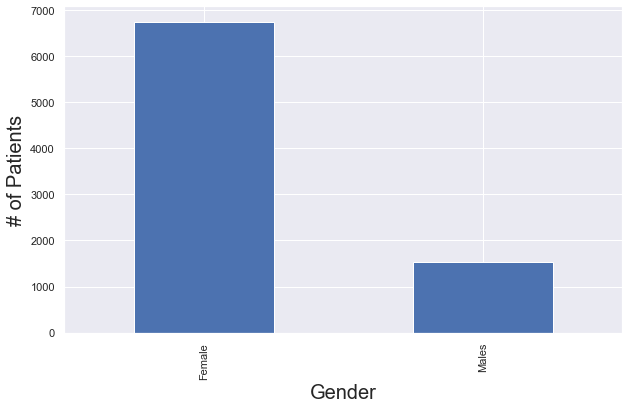

In [218]:
plt.figure(figsize=(10,6))

q.plot(kind='bar')
plt.xlabel('Gender',size=20)
plt.ylabel('# of Patients',size=20)
plt.legend;

In [219]:
female_sch_show=df[(df['Gender']=='F') & (df['Scholarship']==1) & (df['No_show']=='No')]['Scholarship'].count()


In [220]:
male_sch_show=df[(df['Gender']=='M') & (df['Scholarship']==1) & (df['No_show']=='No')]['Scholarship'].count()


In [221]:
percentage(female_sch_show,female_sch_show+male_sch_show)

81.45599420499819

In [222]:
percentage(male_sch_show,female_sch_show+male_sch_show)

18.544005795001812

Female are showing up more than men. Moreover female have more scholarship then men. Scholarship
can be an incentive to show up

Analysis: 
Total Gender: 65% are female, 35% are Male.
Total Scholarship: 90% have do not have scholarship while only 10% have scholarship.
Scholarship Genderwise: 81% female have scholarship while only 19% of male have scholarship.
Scholarship Genderwise showing up: 81% female having scholarship show up while 19% of male having scholarship show up


Conclusion: Not having scholarship can be a reason for not showing up and vice versa.


### Research Question 2: Does certain age not show up compared to other ages?


In [223]:
# Summary statistics of Age column
df['Age'].describe()

count    110527.000000
mean         37.089219
std          23.109921
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [224]:
# Exploring the percentiles of Age column.
df['Age'].describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9])

count    110527.000000
mean         37.089219
std          23.109921
min           0.000000
10%           5.000000
20%          13.000000
30%          21.000000
40%          30.000000
50%          37.000000
60%          45.000000
70%          52.000000
80%          59.000000
90%          68.000000
max         115.000000
Name: Age, dtype: float64

In [225]:
# Exploring some statistics by the gender classification of Male and Female
grouped_df=df.groupby('Gender').agg({'PatientId': ['count'],'Age':['min', 'max', 'mean','median','std']}).rename(columns={'PatientId':'','Age':''})


In [226]:
grouped_df

count  min    max       mean median        std
Gender                                                
F       71840  0.0  115.0  38.894517   39.0  22.154736
M       38687  0.0  100.0  33.736863   33.0  24.435221

In [227]:
group_age_show=df.groupby(['Gender','No_show']).agg({'PatientId': ['count'],'Age':['min', 'max', 'mean','median','std']}).rename(columns={'PatientId':'','Age':''})


In [228]:
group_age_show

count  min    max       mean median        std
Gender No_show                                                
F      No       57246  0.0  115.0  39.591082   40.0  22.342220
       Yes      14594  0.0  115.0  36.162190   34.0  21.184209
M      No       30962  0.0  100.0  34.461372   34.0  24.734056
       Yes       7725  0.0   97.0  30.833010   28.0  22.972200

Conclusions: 
1. Mean age of male is 34, Mean age of female is 39
2. standard deviation of male is 24, while female is 22.
3. 80% of patients are 59 years and below
4. 20% of patients are 60 and above.

In [229]:
def category_of_ages(age):
    if age>=60:
        return 'Old'
    elif age>=18 and age<60:
        return 'Adult'
    elif age>=11 and age<18:
        return 'Teenager'
    else:
        return 'Children'
df['Age_category'] = df['Age'].apply(category_of_ages)
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,SMS_received,No_show,Age_category
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0,0,No,Old
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,0,No,Adult
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0,0,No,Old
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0,0,No,Children
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,0,No,Adult


In [230]:
# Alternative method of creating a new column by binning
# bins=[0,10,18,60,115]
# age_group=['children','teenager','adult','old']
# df['Age_category']=pd.cut(df['Age'],bins,labels=age_group)

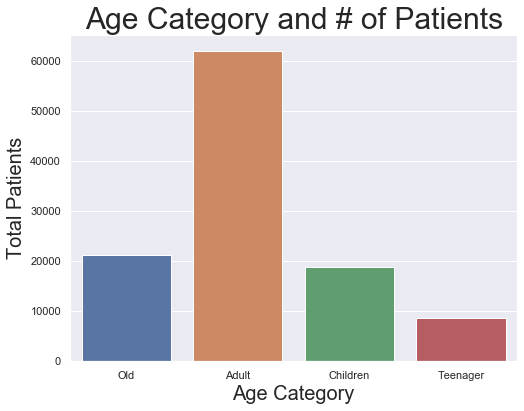

In [231]:
# Age Category for both attending and not attending the Doctor
plt.figure(figsize=(8,6))

sns.countplot("Age_category", data=df)
plt.xlabel('Age Category',size=20)
plt.ylabel('Total Patients',size=20)
plt.title('Age Category and # of Patients',size=30);

In [232]:
# Percentage of Age category showing and not showing off
df_grpage=df.groupby(['Age_category','No_show'])['No_show'].count()

In [233]:
df_final = (df_grpage/df_grpage.groupby(level=0).sum())*100

In [234]:
df_final

Age_category  No_show
Adult         No         78.894716
              Yes        21.105284
Children      No         79.796256
              Yes        20.203744
Old           No         84.688046
              Yes        15.311954
Teenager      No         74.403244
              Yes        25.596756
Name: No_show, dtype: float64

Conclusions: Older people tend to attend the doctor the most as you can see they are 84% followed by children(79%) then followed by Adults.
Of all the above categories teenager have highest 25% of skipping the appointment 

In [235]:
# Total patients on the basis of their age category
df_agecat=df['Age_category'].value_counts()

In [236]:
df_agecat

Adult       61975
Old         21173
Children    18749
Teenager     8630
Name: Age_category, dtype: int64

In [237]:
show=df['No_show']=='No'
df_show=df[show]

In [238]:
# Which age group attends the doctor the most

df_show['Age_category'].value_counts()

Adult       48895
Old         17931
Children    14961
Teenager     6421
Name: Age_category, dtype: int64

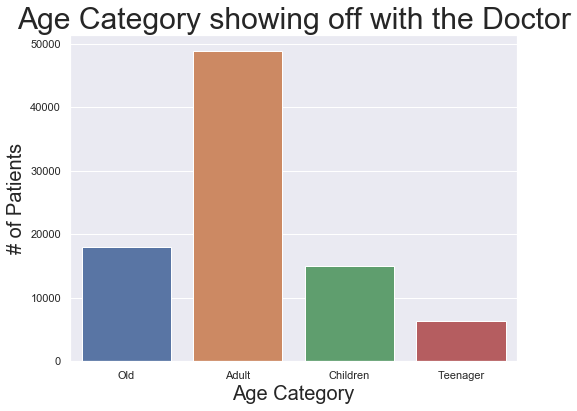

In [239]:
plt.figure(figsize=(8,6))
sns.countplot("Age_category", data=df_show);
plt.xlabel('Age Category',size=20)
plt.ylabel('# of Patients',size=20)
plt.title('Age Category showing off with the Doctor',size=30);


In [240]:
not_show=df['No_show']=='Yes'
df_notshow=df[not_show]

In [241]:
# Which age group does no attends the doctor the most

df_notshow['Age_category'].value_counts()

Adult       13080
Children     3788
Old          3242
Teenager     2209
Name: Age_category, dtype: int64

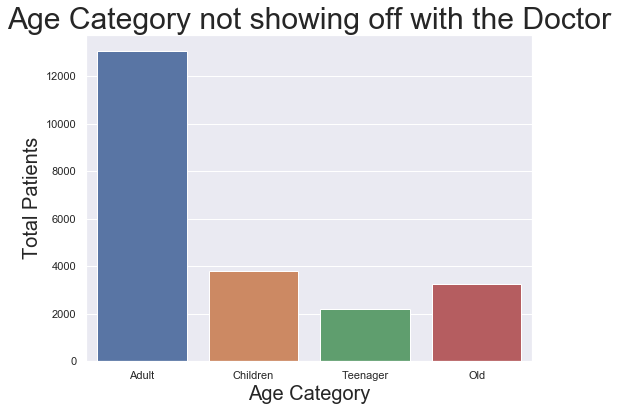

In [242]:
plt.figure(figsize=(8,6))

sns.countplot("Age_category", data=df_notshow);
plt.xlabel('Age Category',size=20)
plt.ylabel('Total Patients',size=20)
plt.title('Age Category not showing off with the Doctor',size=30);



In [243]:
# Subdividing the ages into more bins in order to refine the age_categories.

''

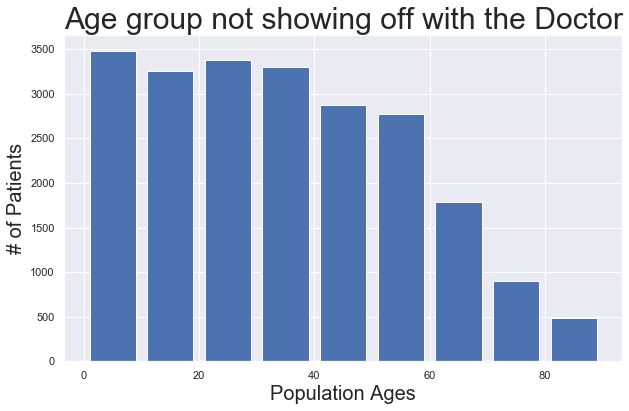

In [244]:
plt.figure(figsize=(10,6))

binage=[0,10,20,30,40,50,60,70,80,90]
plt.hist(df_notshow['Age'],bins=binage,histtype='bar',rwidth=0.8)
plt.xlabel('Population Ages',size=20)
plt.ylabel('# of Patients',size=20)
plt.title('Age group not showing off with the Doctor',size=30);
;

Conclusion: The above chart is right schewed. As the age increases the not showed patients decreases. Higher proportion of not showing are from the ages 0 to 40

''

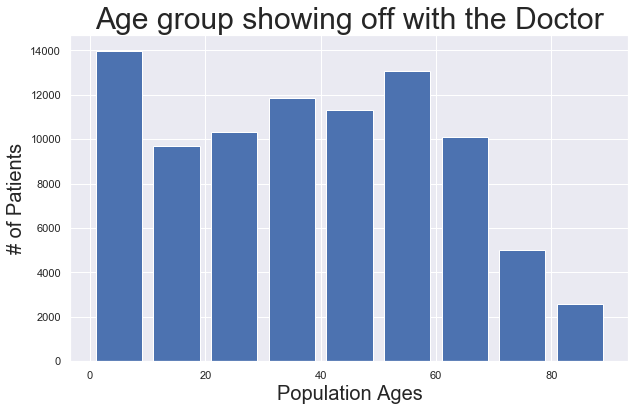

In [245]:
plt.figure(figsize=(10,6))

binage=[0,10,20,30,40,50,60,70,80,90]
plt.hist(df_show['Age'],bins=binage,histtype='bar',rwidth=0.8);
plt.xlabel('Population Ages',size=20)
plt.ylabel('# of Patients',size=20)
plt.title('Age group showing off with the Doctor',size=30);
;

Conclusions:
children are more in showing up. Rather children is the most attending the appointment even if they are less in numbers compared to the adult

Additional Analysis:

In [246]:
# Median of those showing up is around 38 years

df_show['Age'].describe()

count    88208.000000
mean        37.790496
std         23.338513
min          0.000000
25%         18.000000
50%         38.000000
75%         56.000000
max        115.000000
Name: Age, dtype: float64

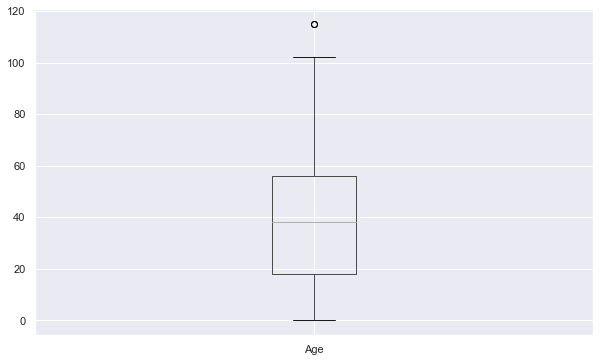

In [247]:
plt.figure(figsize=(10,6))

df_show.boxplot(column='Age');

In [248]:
# Median of those not showing up is around 33 years

df_notshow['Age'].describe()

count    22319.000000
mean        34.317667
std         21.965941
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: Age, dtype: float64

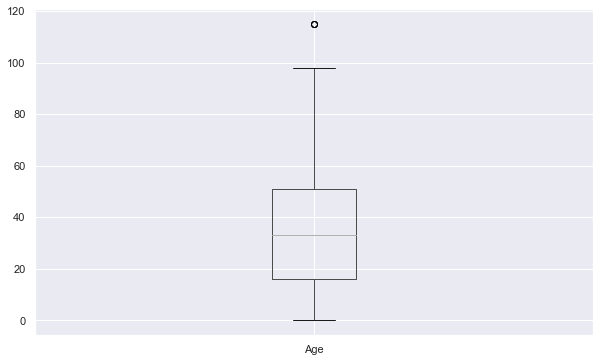

In [249]:
plt.figure(figsize=(10,6))

df_notshow.boxplot(column='Age');

In [250]:
df_show['Age'].describe()

count    88208.000000
mean        37.790496
std         23.338513
min          0.000000
25%         18.000000
50%         38.000000
75%         56.000000
max        115.000000
Name: Age, dtype: float64

In [251]:
df_notshow['Age'].describe()

count    22319.000000
mean        34.317667
std         21.965941
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: Age, dtype: float64


### Research Question 3: Does sending sms to remind for the appointment will increase the chance of attending the appointment?

In [252]:
df_sms=df[['PatientId','Gender','Age','SMS_received','No_show']]

In [253]:
df_sms.head(3)

,PatientId,Gender,Age,SMS_received,No_show
0,2.987250e+13,F,62.0,0,No
1,5.589978e+14,M,56.0,0,No
2,4.262962e+12,F,62.0,0,No


In [254]:
# Pie chart Sms recieved and Sms not recieved

In [255]:
df_sms_reciev=df.SMS_received.value_counts(normalize=True)
names=['Yes','No']

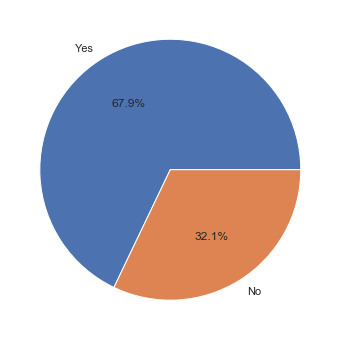

In [256]:
plt.figure(figsize=(8,6))
plt.pie(df_sms_reciev,labels=names,autopct='%1.1f%%');

In [257]:
sms_show=df_sms.query('SMS_received==1 & No_show=="No"')

In [258]:
sms_show.shape

(25698, 5)

In [259]:
nosms_show=df_sms.query('SMS_received==0 & No_show=="No"')

In [260]:
nosms_show.shape

(62510, 5)

In [261]:
# Conclusion 1: When Sms was sent then less people showed up compared to the people who did not showed up

In [262]:
sms_noshow=df_sms.query('SMS_received==1 & No_show=="Yes"')

In [263]:
sms_noshow.shape

(9784, 5)

Another way to create the sms_noshow by numpy
mask=np.logical_and((df_sms['SMS_received']==1),(df_sms['No_show']=='Yes'))
df_sms[mask].shape

In [264]:
sms_noshow.shape

(9784, 5)

In [265]:
nosms_noshow=df_sms.query('SMS_received==0 & No_show=="Yes"')

In [266]:
nosms_noshow.shape

(12535, 5)

In [267]:
# Conclusion: Sending sms will not effect the people who will fullfill their appointment

In [268]:
df_sms.head(10)

,PatientId,Gender,Age,SMS_received,No_show
0,2.987250e+13,F,62.0,0,No
1,5.589978e+14,M,56.0,0,No
2,4.262962e+12,F,62.0,0,No
3,8.679512e+11,F,8.0,0,No
4,8.841186e+12,F,56.0,0,No
5,9.598513e+13,F,76.0,0,No
6,7.336882e+14,F,23.0,0,Yes
7,3.449833e+12,F,39.0,0,Yes
8,5.639473e+13,F,21.0,0,No
9,7.812456e+13,F,19.0,0,No


In [269]:
df_1=pd.DataFrame(df_sms.groupby(['SMS_received','No_show']).count()['PatientId']).rename(columns={'PatientId': 'Total Patients'})

In [270]:
df_1

Total Patients
SMS_received No_show                
0            No                62510
             Yes               12535
1            No                25698
             Yes                9784

In [271]:
df_1.reset_index(inplace=True)

In [272]:
df_1.columns

Index(['SMS_received', 'No_show', 'Total Patients'], dtype='object')

In [273]:
df_nr=df_1.iloc[0:2]

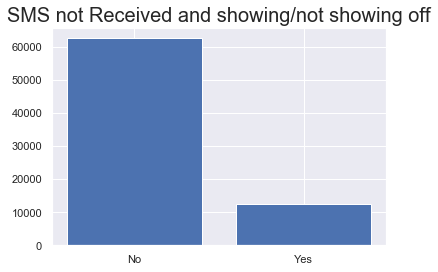

In [274]:
# Plot of the no of people who attended/not-attended on the basis of SMS not received

plt.bar(df_nr.No_show,df_nr['Total Patients'])
plt.title('SMS not Received and showing/not showing off',size=20);


In [275]:
df_r=df_1.iloc[2:]

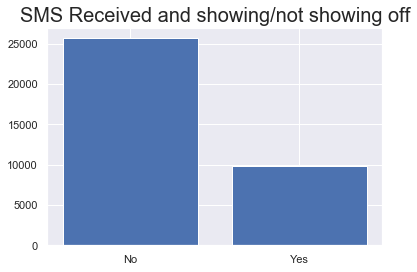

In [276]:
# Plot of the no of people who attended/not-attended on the basis of SMS received
plt.bar(df_r.No_show,df_r['Total Patients'])
plt.title('SMS Received and showing/not showing off',size=20);


In [277]:
# Around 69% of sms was not sent to the patient to remind there appointment still 80% attended the appointment. This shows sms sending has no relevance in the showing of the patientS



### Research Question 4: Does the difference between scheduled data and appointment date have any impact on showing with the Doctor?

In [278]:
# Appointment date is the date when you goto the doctor while scheduled day is the day you phone and take the appoinntment
# We create a new column 'diff' which calculates the diffence in terms of the days
df['diff']=(df['AppointmentDay']-df['ScheduledDay']).dt.days

In [279]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,SMS_received,No_show,Age_category,diff
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0,0,No,Old,-1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,0,No,Adult,-1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0,0,No,Old,-1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0,0,No,Children,-1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,0,No,Adult,-1


In [280]:
df.groupby(['diff','No_show']).count()['PatientId']


diff  No_show
-7    Yes            1
-2    Yes            4
-1    No         36771
      Yes         1792
 0    No          4100
                 ...  
 168  Yes            1
 175  No            10
      Yes            6
 178  No             8
      Yes            2
Name: PatientId, Length: 237, dtype: int64

In [281]:
# Cleaning the data. If the difference is less than 0, we will consider them to be 0.

In [282]:
# Setting all the negative values to zeros(Done according to the suggesiton of my mentor)
df['diff'] = np.where((df['diff'] < 0), 0, df['diff'])

In [283]:
# Alternate method
#df.loc[(df.a < 0), 'a'] = 0
#df.loc[(df['diff'] < 0), 'diff'] = 0


In [284]:
df.loc[0:4,:]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,SMS_received,No_show,Age_category,diff
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0,0,No,Old,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,0,No,Adult,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0,0,No,Old,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0,0,No,Children,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,0,No,Adult,0


In [285]:
df.groupby(['diff','No_show']).count()['PatientId'].head(200)

diff  No_show
0     No         40871
      Yes         2910
1     No          5123
      Yes         1602
2     No          2093
                 ...  
102   Yes            3
103   No             2
      Yes            6
104   No             4
106   No             2
Name: PatientId, Length: 200, dtype: int64

In [286]:
showed=df[df['No_show']=='No']
not_showed=df[df['No_show']=='Yes']

In [287]:
df_diff_show=showed[['diff','No_show']].groupby('diff').count().head(200)

In [288]:
df_diff_notshow=not_showed[['diff','No_show']].groupby('diff').count().head(200)

In [289]:
df_diff_show.columns

Index(['No_show'], dtype='object')

In [290]:
headers=list(df_diff_show.columns.values)

In [291]:
headers[0]="Patients Showing Up"

In [292]:
df_diff_show.columns=headers

In [293]:
df_diff_show.head()

,Patients Showing Up
diff,
0,40871
1,5123
2,2093
3,4059
4,2405


In [294]:
df_diff_notshow=not_showed[['diff','No_show']].groupby('diff').count().head(200)

In [295]:
headers=list(df_diff_notshow.columns.values)

In [296]:
headers[0]="Patients Not Showing Up"

In [297]:
df_diff_notshow.columns=headers

In [298]:
df_diff_notshow.head()

,Patients Not Showing Up
diff,
0,2910
1,1602
2,644
3,1231
4,872


In [299]:
# merging the two dataframes with date diff and showing or not showing
df_merge=pd.merge(df_diff_show,df_diff_notshow,how='inner',on='diff')[:20]

In [300]:
df_merge

,Patients Showing Up,Patients Not Showing Up
diff,,
0,40871,2910
1,5123,1602
2,2093,644
3,4059,1231
4,2405,872
5,3036,1001
6,3597,1309
7,1662,670
8,1165,440


In [301]:
df_merge.reset_index(inplace=True)

<Figure size 720x432 with 0 Axes>

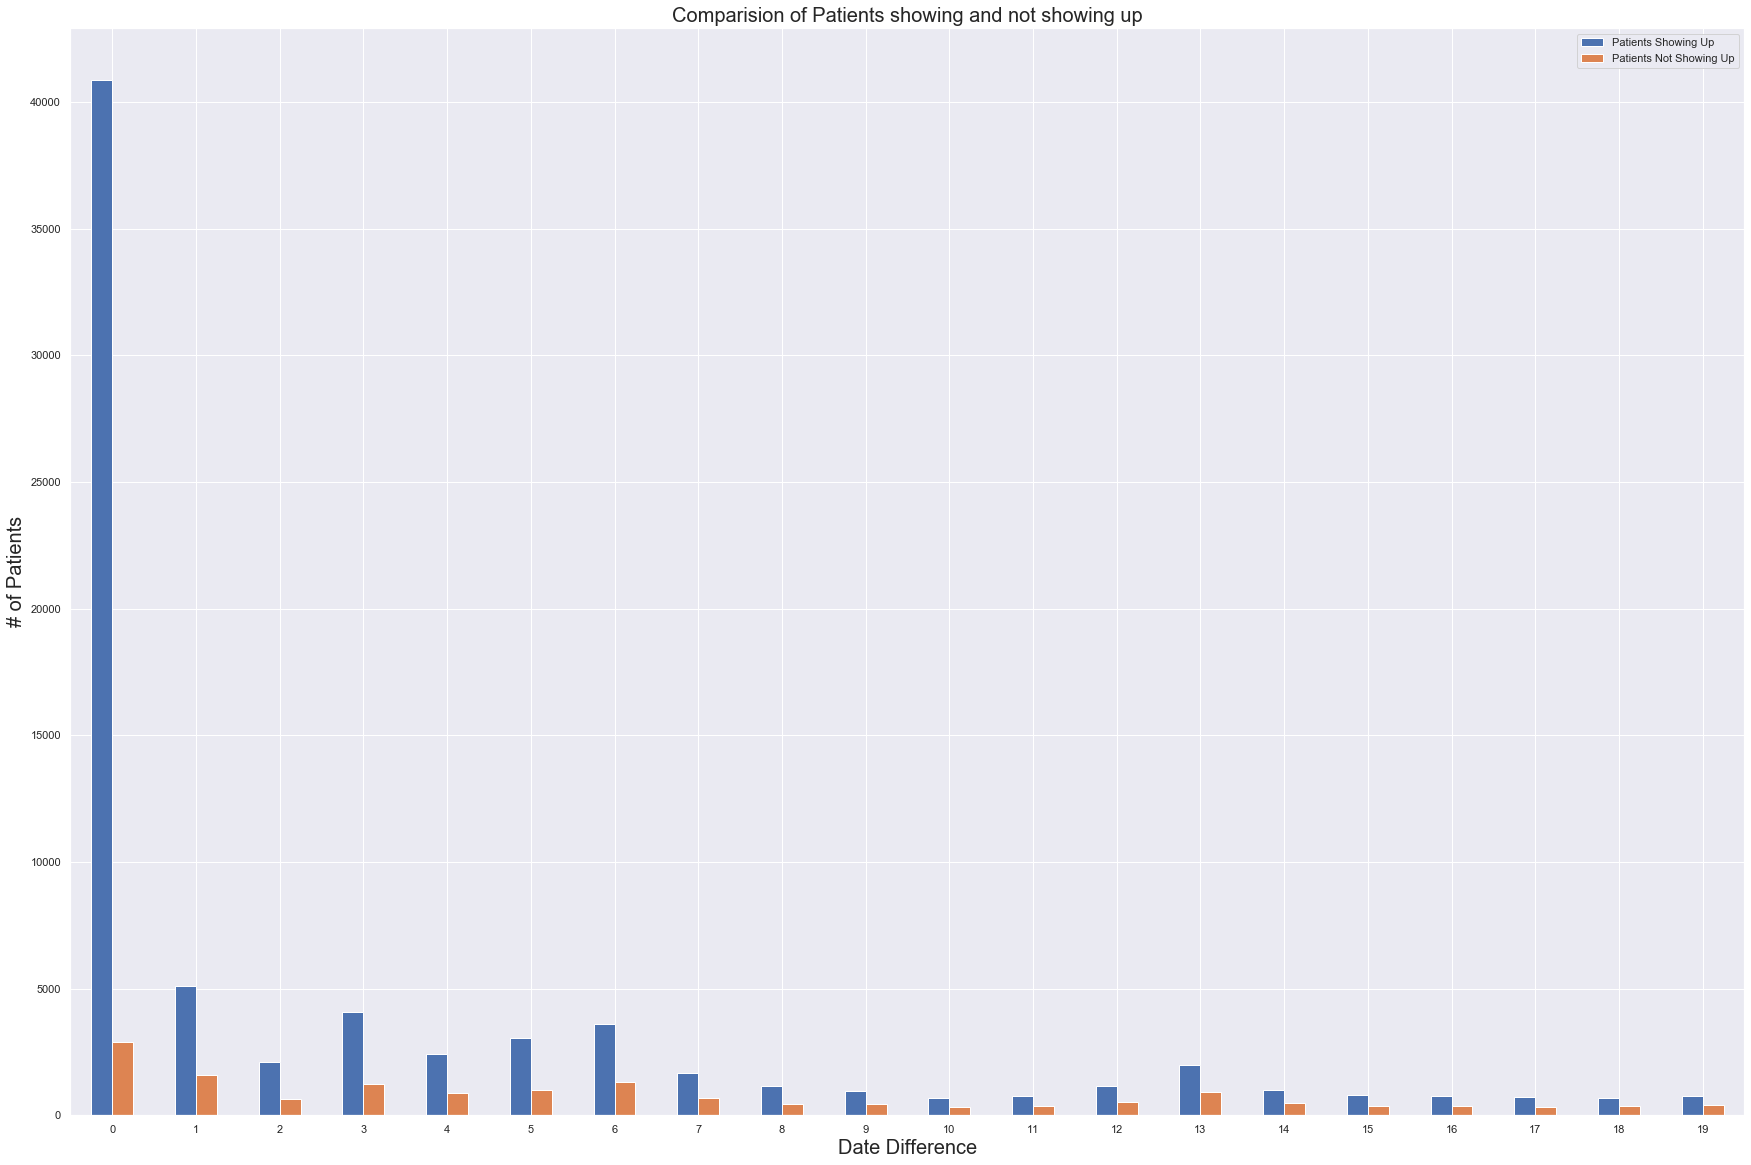

In [302]:
plt.figure(figsize=(10,6))

df_merge.plot.bar(x='diff', rot=0,figsize=(30,20))
plt.xlabel('Date Difference',size=20)
plt.ylabel('# of Patients',size=20)
plt.title('Comparision of Patients showing and not showing up',size=20);


Conclusions: The date difference between the appointment date and scheduled date plays an important role in deciding whether the patient will attend the doctor or he will skip the doctor. If there is no date difference you can see that there are highest patient attending the doctor. As thee days increase then the people attending the doctor goes down

<a id='conclusions'></a>
## Conclusions
Question: 1-From the finding we see that even though female are high proportion, the scholarship they recieve can be a reason for them attending the doctor. Male in comparision to that have less proportion of scholarship and this may be reason that they are not attending. Exploring economic factors can shed light to this issue.<br>
Limitation: Females are more in the dataset. Only 10% people with scholarship? and that too women more again.
This does not gives a clear picture.
Question: 2- Above 50 age and children less than 12 yrs show more frequently. This points to their health conditions and necessity to attend the doctor.<br>
Limitations: Brazil's diabetes rate is 11.4%. Brazil has Hypertension  around 30%. Our data has 19%. This itself is a big discrepency. Our data it seems of quite healthy people who can skip the doctors appointment because they think they fine enough.
Question: 3- Sending SMS does not influence the attending the doctor.<br>
Limitation: SMS may not be factor it seems for the people who have made up their mind to go or not goto the doctor.
Question:4- The data diffence between appointment and the scheduled days play a role.<br>
So if the hospital has a huge waiting and gives late appointment then there is a possibility that the patient will not show up. Does he go somewhere else because of the continued illness?<br>
Limitation: There is still a confusion regarding what comes first Schedule day or Appointment day. Different people have different opinion. There is huge differnce in no of patients for 0 day diff(40871) and 1 day diff(5123). Why?
Note: I was wondering if there is a reason that the seriousness of the health condition can be factor in showing off. Not so serious health problem may not show off because they might have recovered from the illness.



## Resources used for findings
1. Learn Data Analysis with Python-Henly & Wolf
2. https://www.datascienceexamples.com/groupby-and-aggregation-with-pandas/
3. https://pbpython.com/groupby-agg.html
4. https://pbpython.com/pandas_dtypes.html
